"""
### Hands-on Lab 1.2: Building Your First Convolutional Neural Network (CNN)

**Objective:**
In this lab, you will build and train a basic Convolutional Neural Network (CNN) from scratch using TensorFlow and Keras to classify a simulated medical image dataset. This notebook will guide you through the entire process, from data loading to model evaluation.

**Instructions:**
* Read through the notebook, paying close attention to the comments.
* Complete the code in the sections marked with "# TODO: ...".
* Run each cell sequentially to see the results.
"""


# =====================================================================================
# STEP 1: SETUP AND DATA LOADING
# ===============================================================================


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


# --- Simulating a Medical Image Dataset ---
# For this lab, we will simulate a dataset of 1000 images, each 64x64 pixels with 3 channels (RGB).
# There are two classes: "Healthy" and "Diseased".

In [ ]:
num_images = 1000
image_size = (64, 64)
num_classes = 2

In [ ]:
print("\n--- Simulating data... ---")
# Generate random image data and labels
X = np.random.rand(num_images, image_size[0], image_size[1], 3).astype('float32')
y = np.random.randint(0, num_classes, num_images)


--- Simulating data... ---


This line of code generates a NumPy array named X to simulate image data. Let's break it down:

np.random.rand(...): This is a NumPy function that creates an array of a given shape with random values between 0 and 1.
(num_images, image_size[0], image_size[1], 3): This is the shape of the array being created.

num_images: This is the total number of images (1000 in this case).

image_size[0]: This is the height of each image (64 pixels).

image_size[1]: This is the width of each image (64 pixels).

3: This represents the number of color channels (3 for RGB).

.astype('float32'): This converts the data type of the array elements to float32. This is a common data type for neural network inputs.

So, in summary, this line creates a NumPy array X with a shape of (1000, 64, 64, 3) containing random floating-point numbers between 0 and 1, simulating a dataset of 1000 RGB images, each 64x64 pixels.

In [ ]:
# Check the shapes of the generated data
print(f"Image data shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")

Image data shape (X): (1000, 64, 64, 3)
Labels shape (y): (1000,)


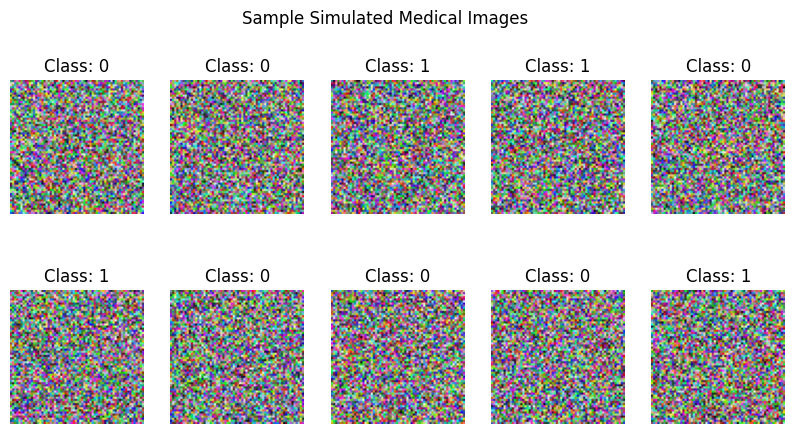

In [ ]:

# Visualize a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i])
    plt.title(f"Class: {y[i]}")
    plt.axis('off')
plt.suptitle("Sample Simulated Medical Images")
plt.show()

# =====================================================================================
# STEP 2: DATA PREPROCESSING
# ================================

In [ ]:
# Normalize the pixel values to a range of [0, 1]
# The simulated data is already in this range, but this is a crucial step for real data.
X_normalized = X / 255.0

In [ ]:
# Split the dataset into training and testing sets
# We will use 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (800, 64, 64, 3)
Testing data shape: (200, 64, 64, 3)




# =====================================================================================
# STEP 3: BUILDING THE CNN MODEL
# =====================================================================================

# Define the CNN architecture using Keras Sequential API.
# This model will have convolutional layers to extract features, followed by dense layers for classification.


In [ ]:
print("\n--- Building the model... ---")


--- Building the model... ---


In [ ]:
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
#In your current model, input_shape=(image_size[0], image_size[1], 3) tells the first Conv2D layer that it will receive input images with a height of image_size[0] (64 pixels),
#a width of image_size[1] (64 pixels), and 3 color channels (RGB).

    # TODO: Add a second Convolutional Block
    # Use another Conv2D layer with 64 filters and a 3x3 kernel.
    # Add a MaxPooling2D layer with a 2x2 pool size.
    # YOUR CODE STARTS HERE
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # YOUR CODE ENDS HERE

    # Flatten the 3D feature maps to a 1D vector for the Dense layers
    Flatten(),

    # Dense Layers for Classification
    Dense(64, activation='relu'),

    # TODO: Add a Dropout layer
    # Add a Dropout layer with a rate of 0.5 to prevent overfitting.
    # YOUR CODE STARTS HERE
    Dropout(0.5),
    # YOUR CODE ENDS HERE

    # Output Layer
    Dense(num_classes, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Discuss the input_shape parameter and why it's important.**

The input_shape parameter in the first layer of a Keras Sequential model is crucial because it tells the model the expected shape of the input data.

Here's why it's important:

Model Building: Keras needs to know the shape of the input to correctly build the layers and calculate the number of parameters in the model. For example, a Conv2D layer needs to know the dimensions of the input images to determine how to apply its filters.

Parameter Initialization: The weights and biases of the layers are initialized based on the input shape.

Compatibility: Subsequent layers in the model rely on the output shape of the preceding layer. By defining the input_shape in the first layer, Keras can automatically infer the shape of the data as it passes through the network, ensuring compatibility between layers.

Error Prevention: If the actual input data shape doesn't match the specified input_shape, Keras will raise an error, preventing you from training the model with incorrect data dimensions.

In [ ]:
# Print a summary of the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,402 (3.14 MB)

 Trainable params: 822,402 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

# =====================================================================================
# STEP 4: COMPILING AND TRAINING THE MODEL
# =====================================================================================

In [ ]:
# Compile the model by specifying the optimizer, loss function, and metrics.
print("\n--- Compiling the model... ---")


--- Compiling the model... ---


In [ ]:
# TODO: Compile the model
# Use the 'adam' optimizer, 'sparse_categorical_crossentropy' for the loss function, and 'accuracy' as a metric.
# YOUR CODE STARTS HERE
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# YOUR CODE ENDS HERE

In [ ]:
# Train the model
print("\n--- Training the model... ---")


--- Training the model... ---


In [ ]:
# We'll train for 10 epochs.
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.5171 - loss: 0.6940 - val_accuracy: 0.5100 - val_loss: 0.6930
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - accuracy: 0.5081 - loss: 0.6931 - val_accuracy: 0.5100 - val_loss: 0.6929
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.4994 - loss: 0.6936 - val_accuracy: 0.5100 - val_loss: 0.6929
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.5050 - loss: 0.6928 - val_accuracy: 0.5100 - val_loss: 0.6929
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - accuracy: 0.5147 - loss: 0.6930 - val_accuracy: 0.5100 - val_loss: 0.6929
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.4565 - loss: 0.6946 - val_accuracy: 0.4900 - val_loss: 0.6932
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.5162 - loss: 0.6928 - val_accuracy: 0.5100 - val_loss: 0.6930
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.4930 - loss: 0.6929 - val_accuracy: 0.


# =====================================================================================
# STEP 5: EVALUATING THE MODEL
# =====================================================================================

In [ ]:
# Evaluate the model on the test data
print("\n--- Evaluating the model... ---")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


--- Evaluating the model... ---
7/7 - 1s - 73ms/step - accuracy: 0.5100 - loss: 0.6930

Test accuracy: 0.5100


In [ ]:
# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs_range = range(10)

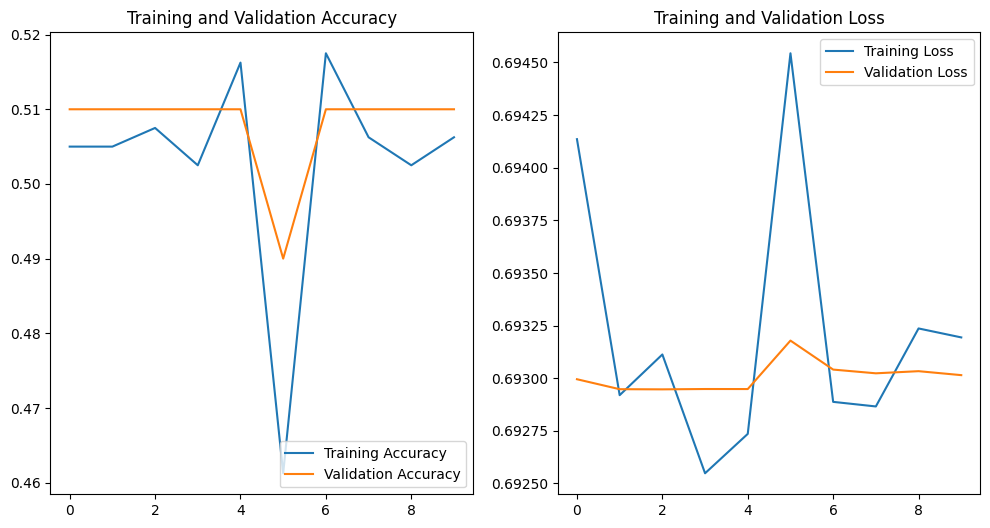

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# =====================================================================================
# DISCUSSION AND NEXT STEPS
# =====================================================================================

**Discussion:**
* Look at the plots. Did your model's accuracy improve over time?
* How did the training accuracy and validation accuracy compare?
* What does it mean if the training accuracy is much higher than the validation accuracy? (Hint: Overfitting!)

Qn 1: Look at the plots. Did your model's accuracy improve over time?


Ans: Looking at the plots and the training output, the model's accuracy did not significantly improve over time. Both the training accuracy and validation accuracy hover around 0.5, which is what you would expect from random guessing with two classes. The plots show very little change in accuracy or loss across the epochs.

The training accuracy and validation accuracy are very close to each other, which suggests that the model is not overfitting to the training data. However, this is likely because the simulated random data is not complex enough for the model to learn any meaningful patterns.

Since the data is completely random, the model is unable to find any patterns to distinguish between the two classes, hence the accuracy remains around 50%. In a real-world scenario with meaningful data, we would expect to see the training accuracy increase over time, and ideally, the validation accuracy would follow a similar trend without a large gap between the two (which would indicate overfitting).

Qn 2:  How did the training accuracy and validation accuracy compare?

Ans:   The training accuracy and validation accuracy are very similar throughout the training process. Both started around 0.5 and remained close to that value across all epochs. There isn't a significant gap between them, which suggests that the model is not overfitting to the training data. However, as mentioned before, this is likely because the simulated random data is not complex enough for the model to learn any meaningful patterns.

Qn 3:  What does it mean if the training accuracy is much higher than the validation accuracy? (Hint: Overfitting!)

Ans: If the training accuracy is much higher than the validation accuracy, it means that your model is overfitting the training data.

Overfitting occurs when a model learns the training data too well, including the noise and specific patterns that are not representative of the underlying problem. As a result, the model performs very well on the training data but poorly on unseen data (like the validation set). It has essentially memorized the training examples rather than learning generalizable features.

This is a common problem in machine learning, and techniques like dropout (which you've included in your model) and data augmentation are used to mitigate it.

**Next Steps (for future labs):**

* How could we improve the model's performance?

* Try adding more layers or different types of layers.

* In the next lab, we will learn how to use **Data Augmentation** to create more training data and prevent overfitting.
"""

Based on the results from the simulated random data, the model isn't learning meaningful patterns. In a real-world scenario with more representative data, here are some ways you could potentially improve the model's performance:

**Data Augmentation:**

 This involves creating new training examples by applying random transformations (like rotations, shifts, zooms) to the existing images. This helps increase the size and diversity of your training data, making the model more robust and less likely to overfit.

**Adjusting the Model Architecture:**

1. Adding More Layers:

Deeper networks can sometimes learn more complex features. You could try adding more convolutional or dense layers.

2. Changing Layer Types:

 Experiment with different types of layers, such as Inception modules or Residual blocks, which are designed to improve performance in CNNs.

3. Adjusting Filter Sizes and Number:

 You could try different filter sizes in your convolutional layers and vary the number of filters in each layer.

**Hyperparameter Tuning:**

 Experiment with different values for hyperparameters like the learning rate of the optimizer, the dropout rate, the number of epochs, and the batch size.

**Using Pre-trained Models: **

 For many image classification tasks, it's beneficial to start with a model that has already been trained on a large dataset (like ImageNet).

  You can then fine-tune this pre-trained model on your specific dataset.
  
  This is a form of transfer learning and can significantly improve performance, especially with smaller datasets